# Dataset 3 Analysis and Experimants

In [1]:
import warnings
warnings.filterwarnings("ignore") # because warnings are annoying

### Importing the Data

In [2]:
import os
import cv2
import pandas as pd
import numpy as np

train_images_normal_folder = 'dataset3/train/NORMAL'
train_images_pnuemonia_folder = 'dataset3/train/PNEUMONIA'
test_images_normal_folder = 'dataset3/test/NORMAL'
test_images_pnuemonia_folder = 'dataset3/test/PNEUMONIA'

# https://stackoverflow.com/questions/30230592/loading-all-images-using-imread-from-a-given-folder
# function from @derricw, May 2015
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename), 0) # adding 0 makes the images grey scale
        img = cv2.resize(img, (50, 50), interpolation= cv2.INTER_LINEAR)
        img = np.hstack(img)
        if img is not None:
            images.append(img)
    return images

colnames = list(range(2500))
train_images_normal = load_images_from_folder(train_images_normal_folder)
train_images_normal_data = pd.DataFrame(train_images_normal, columns=colnames)
train_images_normal_data['Class'] = 0

train_images_pnuemonia = load_images_from_folder(train_images_pnuemonia_folder)
df = pd.DataFrame(train_images_pnuemonia, columns=colnames)
df['Class'] = 1
train_data = train_images_normal_data.append(df)

test_images_normal = load_images_from_folder(test_images_normal_folder)
test_images_normal_data = pd.DataFrame(test_images_normal, columns=colnames)
test_images_normal_data['Class'] = 0

test_images_pnuemonia = load_images_from_folder(test_images_pnuemonia_folder)
df = pd.DataFrame(test_images_pnuemonia, columns=colnames)
df['Class'] = 1
test_data = test_images_normal_data.append(df)

In [3]:
Xtrain = train_data.iloc[:,:-1].values
ytrain = train_data.iloc[:, -1].values
Xtest = test_data.iloc[:,:-1].values
ytest = test_data.iloc[:, -1].values

In [4]:
algorithms = []
accs = []

### Expeperiment 1: Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(Xtrain, ytrain)
ypred = lr.predict(Xtest)

              precision    recall  f1-score   support

           0      0.933     0.359     0.519       234
           1      0.719     0.985     0.831       390

    accuracy                          0.750       624
   macro avg      0.826     0.672     0.675       624
weighted avg      0.799     0.750     0.714       624


Confusion Matrix:


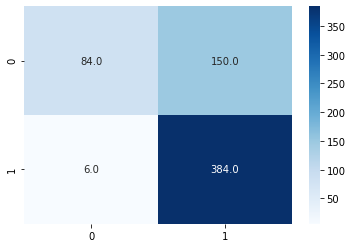

In [6]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sn
ac = accuracy_score(ytest, ypred) 
report = metrics.classification_report(ytest, ypred, digits=3)
print(report)
print()
print("Confusion Matrix:")
cm = confusion_matrix(ytest, ypred)
plt.figure(figsize=(6, 4))
sn.heatmap(cm, annot=True, cmap='Blues', fmt=".1f")
algorithms.append("Logistic Regression")
accs.append(ac)

### Experiment 2: Decision Tree

In [7]:
from sklearn.tree import DecisionTreeClassifier
rng = np.random.RandomState(1)
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(Xtrain, ytrain)
ypred = dt.predict(Xtest)

              precision    recall  f1-score   support

           0      0.669     0.457     0.543       234
           1      0.726     0.864     0.789       390

    accuracy                          0.712       624
   macro avg      0.698     0.661     0.666       624
weighted avg      0.705     0.712     0.697       624


Confusion Matrix:


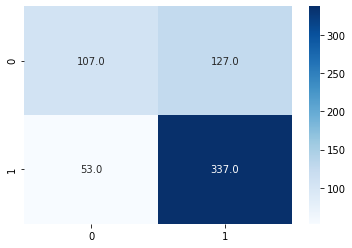

In [8]:
ac = accuracy_score(ytest, ypred) 
report = metrics.classification_report(ytest, ypred, digits=3)
print(report)
print()
print("Confusion Matrix:")
cm = confusion_matrix(ytest, ypred)
plt.figure(figsize=(6, 4))
sn.heatmap(cm, annot=True, cmap='Blues', fmt=".1f")
algorithms.append("Decision Tree")
accs.append(ac)

### Experiment 3: Support Vector Machine (SVM)

In [9]:
from sklearn.svm import SVR
rng = np.random.RandomState(1)
svr = SVR()
svr.fit(Xtrain, ytrain)
ypred = svr.predict(Xtest)

              precision    recall  f1-score   support

           0      0.946     0.372     0.534       234
           1      0.724     0.987     0.835       390

    accuracy                          0.756       624
   macro avg      0.835     0.679     0.684       624
weighted avg      0.807     0.756     0.722       624


Confusion Matrix:


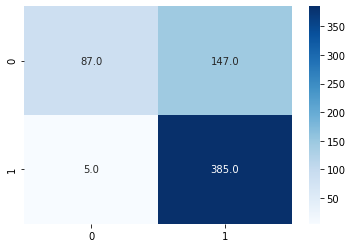

In [10]:
# ac = accuracy_score(ytest, np.round(abs(ypred)), normalize=False)
report = metrics.classification_report(ytest, np.round(abs(ypred)), digits=3)
print(report)
print()
print("Confusion Matrix:")
cm = confusion_matrix(ytest, np.round(abs(ypred)))
ac = np.trace(cm) / np.sum(cm)
plt.figure(figsize=(6, 4))
sn.heatmap(cm, annot=True, cmap='Blues', fmt=".1f")
algorithms.append("SVM")
accs.append(ac)

### Experiment 4: Naive Bayes

In [11]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(Xtrain, ytrain)
ypred = classifier.predict(Xtest)

              precision    recall  f1-score   support

           0      0.639     0.637     0.638       234
           1      0.783     0.785     0.784       390

    accuracy                          0.729       624
   macro avg      0.711     0.711     0.711       624
weighted avg      0.729     0.729     0.729       624


Confusion Matrix:


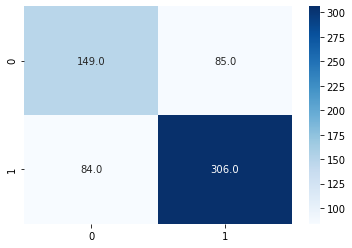

In [12]:
ac = accuracy_score(ytest, ypred) 
report = metrics.classification_report(ytest, ypred, digits=3)
print(report)
print()
print("Confusion Matrix:")
cm = confusion_matrix(ytest, ypred)
plt.figure(figsize=(6, 4))
sn.heatmap(cm, annot=True, cmap='Blues', fmt=".1f")
algorithms.append("Naive Bayes")
accs.append(ac)

### Experiment 5: K-Nearest Neighbour (kNN)

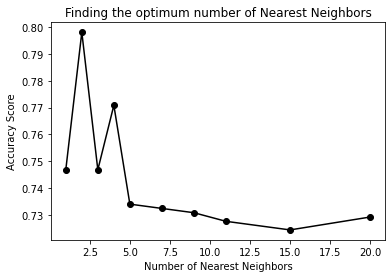

In [13]:
from sklearn.neighbors import KNeighborsClassifier
nn_numbers = [1, 2,3, 4,5, 7, 9, 11, 15, 20]
accuracys = []
for k in nn_numbers:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(Xtrain, ytrain)
    ypred = knn.predict(Xtest)
    cm = confusion_matrix(ytest, ypred)
    score = np.trace(cm) / np.sum(cm)
    accuracys.append(score)
plt.plot(nn_numbers, accuracys, '-ok')
plt.xlabel("Number of Nearest Neighbors")
plt.ylabel("Accuracy Score")
plt.title("Finding the optimum number of Nearest Neighbors")
plt.show()

In [14]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(Xtrain, ytrain)
ypred = knn.predict(Xtest)

              precision    recall  f1-score   support

           0      0.891     0.526     0.661       234
           1      0.772     0.962     0.856       390

    accuracy                          0.798       624
   macro avg      0.831     0.744     0.759       624
weighted avg      0.816     0.798     0.783       624


Confusion Matrix:


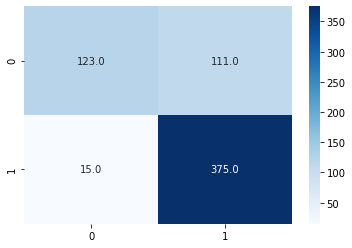

In [15]:
ac = accuracy_score(ytest, ypred) 
report = metrics.classification_report(ytest, ypred, digits=3)
print(report)
print()
print("Confusion Matrix:")
cm = confusion_matrix(ytest, ypred)
plt.figure(figsize=(6, 4))
sn.heatmap(cm, annot=True, cmap='Blues', fmt=".1f")
algorithms.append("kNN")
accs.append(ac)

### Experiment 6: K-Means

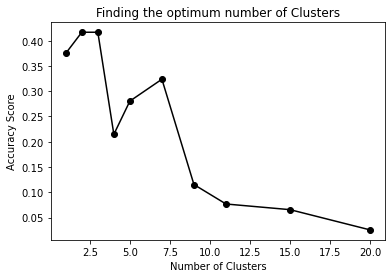

In [16]:
from sklearn.cluster import KMeans
k_numbers = [1, 2,3, 4,5, 7, 9, 11, 15, 20]
accuracys = []
for k in nn_numbers:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(Xtrain, ytrain)
    ypred = kmeans.predict(Xtest)
    cm = confusion_matrix(ytest, ypred)
    score = np.trace(cm) / np.sum(cm)
    accuracys.append(score)
plt.plot(k_numbers, accuracys, '-ok')
plt.xlabel("Number of Clusters")
plt.ylabel("Accuracy Score")
plt.title("Finding the optimum number of Clusters")
plt.show()

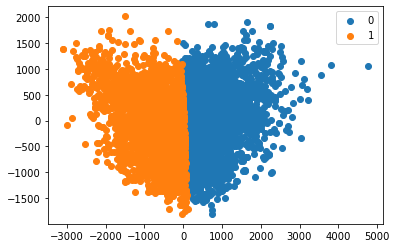

In [17]:
from sklearn.decomposition import PCA
pca = PCA(2)
df = pca.fit_transform(Xtrain)
kmeans = KMeans(n_clusters = 2)
label = kmeans.fit_predict(df)
u_labels = np.unique(label)
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0      0.267     0.501     0.348      1349
           1      0.751     0.522     0.616      3883

    accuracy                          0.516      5232
   macro avg      0.509     0.511     0.482      5232
weighted avg      0.626     0.516     0.547      5232


Confusion Matrix:


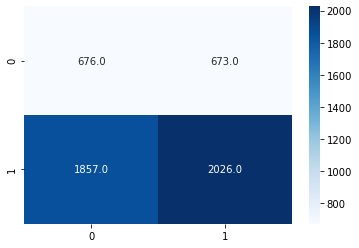

In [18]:
ypred = label
ac = accuracy_score(ytrain, ypred) 
report = metrics.classification_report(ytrain, ypred, digits=3)
print(report)
print()
print("Confusion Matrix:")
cm = confusion_matrix(ytrain, ypred)
plt.figure(figsize=(6, 4))
sn.heatmap(cm, annot=True, cmap='Blues', fmt=".1f")
algorithms.append("K-Means")
accs.append(ac)

### Experiment 7: Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

              precision    recall  f1-score   support

           0      0.850     0.145     0.248       234
           1      0.658     0.985     0.789       390

    accuracy                          0.670       624
   macro avg      0.754     0.565     0.518       624
weighted avg      0.730     0.670     0.586       624


Confusion Matrix:


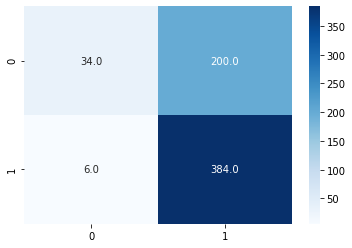

In [20]:
ac = accuracy_score(ytest, ypred) 
report = metrics.classification_report(ytest, ypred, digits=3)
print(report)
print()
print("Confusion Matrix:")
cm = confusion_matrix(ytest, ypred)
plt.figure(figsize=(6, 4))
sn.heatmap(cm, annot=True, cmap='Blues', fmt=".1f")
algorithms.append("Random Forest")
accs.append(ac)

### Experiment 8: Linear Discriminant Analysis (LDA)

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

              precision    recall  f1-score   support

           0      0.823     0.397     0.536       234
           1      0.724     0.949     0.821       390

    accuracy                          0.742       624
   macro avg      0.774     0.673     0.679       624
weighted avg      0.761     0.742     0.714       624


Confusion Matrix:


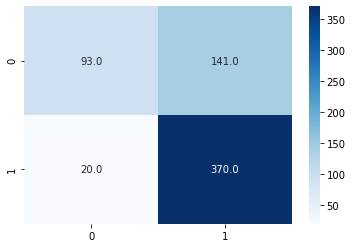

In [22]:
ac = accuracy_score(ytest, ypred) 
report = metrics.classification_report(ytest, ypred, digits=3)
print(report)
print()
print("Confusion Matrix:")
cm = confusion_matrix(ytest, ypred)
plt.figure(figsize=(6, 4))
sn.heatmap(cm, annot=True, cmap='Blues', fmt=".1f")
algorithms.append("LDA")
accs.append(ac)

### Experiment 9: Gradient Boosting Algorithm

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

              precision    recall  f1-score   support

           0      0.920     0.295     0.447       234
           1      0.699     0.985     0.818       390

    accuracy                          0.726       624
   macro avg      0.810     0.640     0.632       624
weighted avg      0.782     0.726     0.679       624


Confusion Matrix:


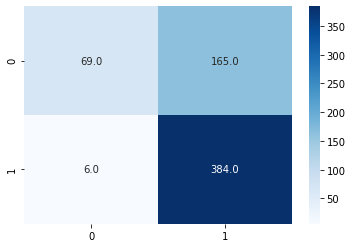

In [24]:
ac = accuracy_score(ytest, ypred) 
report = metrics.classification_report(ytest, ypred, digits=3)
print(report)
print()
print("Confusion Matrix:")
cm = confusion_matrix(ytest, ypred)
plt.figure(figsize=(6, 4))
sn.heatmap(cm, annot=True, cmap='Blues', fmt=".1f")
algorithms.append("Gradient Boosting Algorithm")
accs.append(ac)

### Experiment 10: Convolutional Neural Network (CNN)

Array dimensions before reshaping
(5232, 2500)
(624, 2500)

Array dimensions after reshaping
(5232, 50, 50)
(624, 50, 50)


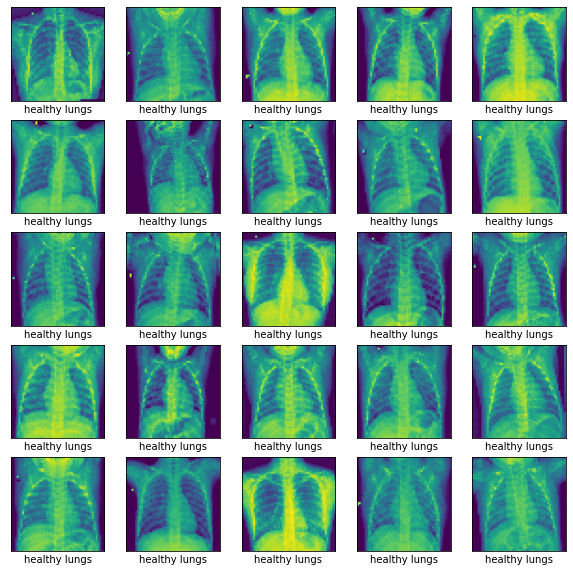

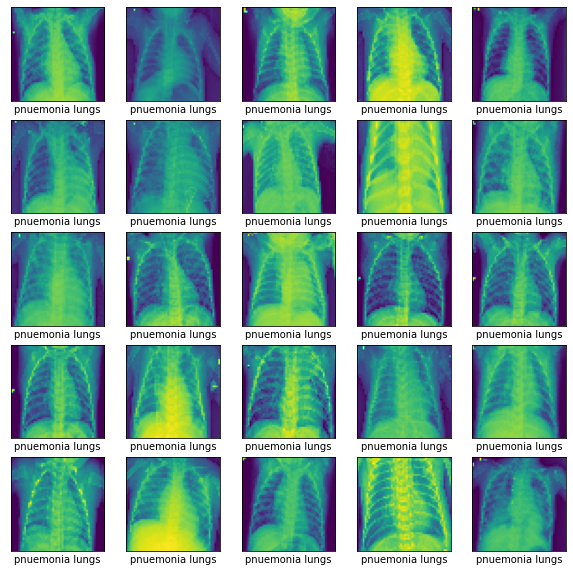

In [25]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
label_text = ["healthy lungs", "pnuemonia lungs"]
print("Array dimensions before reshaping")
print(Xtrain.shape) 
print(Xtest.shape)
Xtrain = Xtrain.reshape(5232, 50, 50) 
Xtest = Xtest.reshape(624, 50, 50)
print()
print("Array dimensions after reshaping")
print(Xtrain.shape) 
print(Xtest.shape)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Xtrain[i])
    plt.xlabel(label_text[ytrain[i]])
plt.show()
plt.figure(figsize=(10,10))
for i in range(25):
    index = len(Xtrain)-i-1
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Xtrain[index])
    plt.xlabel(label_text[ytrain[index]])
plt.show()

In [26]:
model = models.Sequential()
model.add(layers.Conv2D(50, (5,5), activation='relu', input_shape=(50, 50, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(100, (5,5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(100, (5,5), activation='relu'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 50)        1300      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 50)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 19, 19, 100)       125100    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 100)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 100)         250100    
                                                                 
Total params: 376,500
Trainable params: 376,500
Non-trai

In [28]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 50)        1300      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 50)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 19, 19, 100)       125100    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 100)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 100)         250100    
                                                                 
 flatten (Flatten)           (None, 2500)              0

In [30]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(Xtrain, ytrain, epochs=10, 
                    validation_data=(Xtest, ytest))

Epoch 1/10
164/164 [==============================] - 26s 156ms/step - loss: 1.0619 - accuracy: 0.8410 - val_loss: 0.4312 - val_accuracy: 0.7933
Epoch 2/10
164/164 [==============================] - 26s 156ms/step - loss: 0.1558 - accuracy: 0.9383 - val_loss: 0.7165 - val_accuracy: 0.7436
Epoch 3/10
164/164 [==============================] - 26s 158ms/step - loss: 0.1432 - accuracy: 0.9469 - val_loss: 0.3755 - val_accuracy: 0.8285
Epoch 4/10
164/164 [==============================] - 25s 155ms/step - loss: 0.1109 - accuracy: 0.9568 - val_loss: 0.8846 - val_accuracy: 0.7564
Epoch 5/10
164/164 [==============================] - 26s 161ms/step - loss: 0.0938 - accuracy: 0.9646 - val_loss: 0.7809 - val_accuracy: 0.7869
Epoch 6/10
164/164 [==============================] - 25s 151ms/step - loss: 0.1039 - accuracy: 0.9625 - val_loss: 0.8698 - val_accuracy: 0.7356
Epoch 7/10
164/164 [==============================] - 26s 157ms/step - loss: 0.1000 - accuracy: 0.9641 - val_loss: 1.2867 - val_ac

20/20 - 1s - loss: 0.5204 - accuracy: 0.8269 - 672ms/epoch - 34ms/step


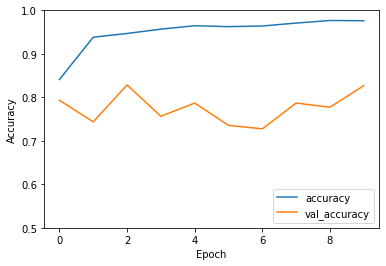

In [31]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(Xtest,  ytest, verbose=2)

In [32]:
print(test_acc)
algorithms.append("CNN")
accs.append(test_acc)

0.8269230723381042


### Results Analysis

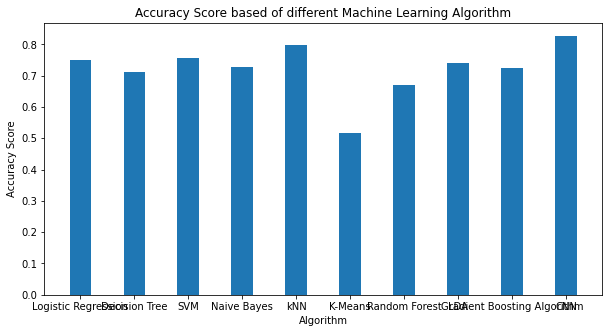

In [33]:
fig = plt.figure(figsize = (10, 5))
plt.bar(algorithms, accs, width = 0.4)
plt.xlabel("Algorithm")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Score based of different Machine Learning Algorithm")
plt.show()

In [34]:
dictionary = dict(zip(algorithms, accs))
winner = max(dictionary, key=dictionary.get)
print("Highest scoring algorithm: "+str(winner))

Highest scoring algorithm: CNN
